## 6-7 다층 퍼셉트론으로 손글씨 분류하기
mnist와 다른 데이터 셋임

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() # 1979개의 이미지 데이터 로드

In [2]:
print(digits.images[0])
# .images[인덱스]로 이미지 데이터를 확인할 수 있음

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))


전체 샘플의 수 : 1797


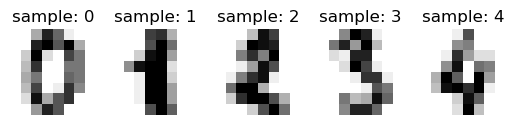

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)


In [5]:
for i in range(5):
    print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [6]:
# 8 x 8 행렬을 64차원의 벡터로 변환
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [7]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [8]:
# 다층 퍼셉트론 분류기 만들기
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)


In [9]:
X = torch.tensor(X, dtype=torch.float32) # 실수형 데이터
Y = torch.tensor(Y, dtype=torch.int64) # 정수형 데이터

In [10]:
loss_fn = nn.CrossEntropyLoss() # 소프트맥스 함수 포함이며, 크로스 엔트로피 함수

In [11]:
losses = []

In [12]:
optimizer = optim.Adam(model.parameters())

In [13]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

    losses.append(loss.item())


Epoch    0/100 Cost: 2.650373
Epoch   10/100 Cost: 2.096846
Epoch   20/100 Cost: 1.820615
Epoch   30/100 Cost: 1.488883
Epoch   40/100 Cost: 1.130555
Epoch   50/100 Cost: 0.828065
Epoch   60/100 Cost: 0.609720
Epoch   70/100 Cost: 0.466021
Epoch   80/100 Cost: 0.369604
Epoch   90/100 Cost: 0.302673


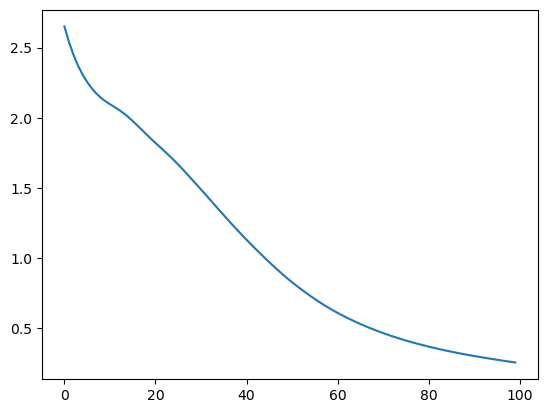

In [14]:
plt.plot(losses)

In [15]:
# 성능 확인
# 예측값 y_pred는 소프트맥스 함수를 거쳐서 확률로 반환되므로 argmax 함수를 사용하여 가장 확률이 높은 클래스를 예측값으로 한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    y_pred = model(X)
    correct_prediction = torch.argmax(y_pred, 1) == Y
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9398998618125916


## 6-8 다층 퍼셉트론으로 MNIST 분류하기

In [16]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml # 사이킷런에서 제공하는 데이터셋을 받아옴

In [17]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# fetch_openml 함수를 사용하여 MNIST 데이터셋을 다운로드
# as_frame=False로 지정하여 데이터프레임 형태가 아닌 넘파이 배열 형태로 데이터를 받아옴
# version=1로 지정하여 데이터의 첫 번째 버전을 다운로드
# mnist 784는 28 x 28 픽셀 이미지를 일렬로 펴놓은 784차원의 벡터 형태로 되어있음

/Users/hyun-uk/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [18]:
print(mnist.data.shape) # 70000개의 샘플과 784개의 특성

(70000, 784)


In [19]:
mnist.target # mnist 데이터셋의 레이블

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [20]:
mnist.target = mnist.target.astype(int) # 타깃을 정수로 변환
mnist.target

array([5, 0, 4, ..., 4, 5, 6])

In [21]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [23]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
y[0]

5

이 이미지 데이터의 레이블은 5이다


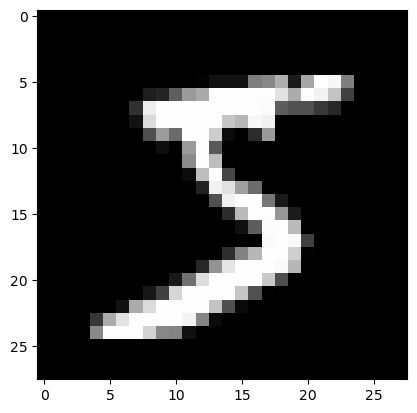

In [25]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print('이 이미지 데이터의 레이블은 {:.0f}이다'.format(y[0]))

In [26]:
# 훈련 데이터와 테스트 데이터로 분리
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)
# 훈련 데이터와 테스트 데이터로 분리
# 훈련 데이터 60000개, 테스트 데이터 10000개
# test_size=1/7로 지정하여 전체 데이터의 1/7만 테스트 데이터로 지정
# random_state=0으로 지정하여 매번 실행시 동일한 학습/테스트 데이터를 얻음

# 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

# 데이터셋 생성
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

# 미니배치로 분할
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)
# DataLoader는 데이터셋을 미니배치로 분할하여 지정한 배치 크기에 맞게 데이터를 반환
# shuffle=True로 지정하여 매 에포크마다 미니배치로 데이터를 셔플
# shuffle=False로 지정하여 테스트 데이터는 셔플하지 않음

In [28]:
from torch import nn

model = nn.Sequential() # nn.Sequential()은 nn.Module 층을 차례로 쌓을 수 있도록 한다.
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [29]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)
# lr=0.01로 학습률을 0.01로 지정
# 최적화 기법은 Adam을 사용
# model.parameters()로 모델의 파라미터를 전달

In [30]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

In [31]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                         data_num, 100. * correct / data_num))


In [32]:
test()


테스트 데이터에서 예측 정확도: 828/10000 (8%)


In [34]:
for epoch in range(3):
    train(epoch)

test()


epoch0：완료
epoch1：완료
epoch2：완료


테스트 데이터에서 예측 정확도: 9577/10000 (96%)


예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


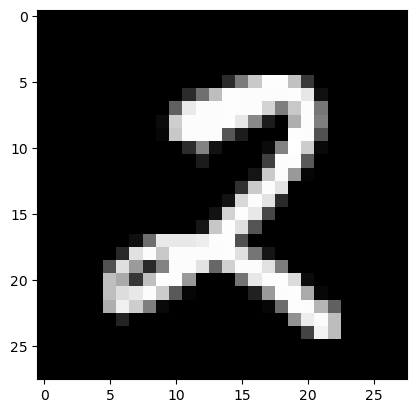

In [35]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))


## 6-9 과적합을 막는 방법

1. 데이터의 양을 늘린다.
2. 모델의 복잡도를 줄인다.
3. 가중치 규제를 추가한다.
4. 드롭아웃을 추가한다.

### 1. 데이터의 양을 늘린다.
- 데이터의 양이 적을 경우, 모델은 데이터에 존재하는 노이즈까지 학습하여 과적합이 발생할 가능성이 높아진다.
- 데이터의 양을 늘릴수록 모델은 데이터에 존재하는 일반적인 패턴을 학습하게 되어 과적합을 방지할 수 있다.

### 2. 모델의 복잡도를 줄인다.
- 과적합이 보일때 인공신경망의 복잡도를 줄이는 조치를 할 수 있다.

### 3. 가중치 규제를 추가한다.
- 복잡한 모델이 간단한 모델보다 과적합될 가능성이 높다.
- 복잡한 모델을 좀 더 간단하게 만들어주는 가중치 규제가 필요하다.
- L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가한다. L1 노름이라고도 한다.
- L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가한다. L2 노름이라고도 한다.
- L1는 람다 * |W|를 더하는 것이므로 람다가 커질수록 가중치의 값이 작아지게 된다.
- L2는 1/2 * 람다 * W^2를 더하는 것이므로 람다가 커질수록 가중치의 값이 작아지게 된다.
- 람다는 규제의 강도를 조절하는 하이퍼파라미터이다.
- L1 규제에서 가중치 w의 값이 0또는 0에 가까이 작아져야해 어떤 특성들은 모델에 영향을 미치지 않게 된다.
- L1은 어떤 특성이 모델에 영향을 미치는지 판단하는데 유용, 이렇지 않을때는 L2 규제를 사용한다.
- L2 규제를 가중치 감쇠(weight decay)라고도 한다.
- 파이토치에서는 옵티마이저의 weight_decay 매개변수를 설정하여 L2 규제를 적용한다.

In [36]:
model = nn.Linear(10, 20)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
# weight_decay 매개변수를 설정하여 L2 규제를 적용한다.
# weight_decay의 기본값은 0이다.

### 4. 드롭아웃을 추가한다.
- 드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법이다.
- 드롭아웃은 신경망 학습시에만 사용하고 예측에는 사용하지 않는다. 
- 드롭아웃은 학습시에 신경망이 특정 뉴런에 과도하게 의존하는 것을 막아 가중치의 균형을 맞춰 과적합을 방지한다.

## 6-10 기울기 소실
- 역전파 과정에서 입력층으로 갈수록 기울기가 점점 작아지는 현상
- 반대의 경우로 기울기가 점점 커지는 현상을 기울기 폭주(gradinet exploding)라고 한다.
- 이는 RNN에서 주로 발생하는 문제이다.
- 여기서 기울기 소실과 기울기 폭주를 막는 방법에 대해 배운다

### 1. ReLU와 ReLU 변형 함수
- 시그모이드와 하이퍼볼릭 탄젠트 대신 ReLU와 ReLU 변형 함수를 사용한다.
- 은닉층에서는 ReLU나 ReLU 변형 함수를 사용한다.

### 2. 가중치 초기화
- 처음에 가중치 초기화를 잘해야 한다.
- 가중치 초기화를 잘하면 기울기 소실과 기울기 폭주를 막을 수 있다.
- 가중치 초기화 방법으로 Xavier 초기화와 He 초기화가 있다.
- Xavier 초기화 : 시그모이드 함수나 하이퍼볼릭 탄젠트 함수를 사용할 때에는 세이비어 초기화를 사용한다.
- He 초기화 : ReLU 함수를 사용할 때에는 He 초기화를 사용한다.
- 파이토치에서는 기본적으로 He 초기화 방법을 사용한다.
- ReLU 계열 함수를 사용할 때는 He 초기화를 사용하고, 
- 시그모이드 함수나 하이퍼볼릭 탄젠트 함수를 사용할 때는 Xavier 초기화를 사용한다.

### 3. 배치 정규화(Batch Normalization)
- 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 정규화를 한다.

1. 내부 공변량 변화(Internal Covariate Shift)
- 학습 과정에서 각 층마다 입력 데이터 분포가 달라지는 현상
- 공변량 변화 : 훈련데이터와 테스트 데이터의 분포가 다른 경우
- 내부 공변량 변화 : 학습 과정에서 각 층마다 입력 데이터 분포가 달라지는 현상

2. 배치 정규화
- 한번에 들어오는 배치 단위로 정규화를 진행한다.
- 활성화 함수를 통과하기 전에 수행
- 입력에 대해 평균을 0으로 만들고, 정규화를 한다.
- 정규화된 데이터에 대해 스케일과 시프트를 수행한다.

3. 배치 정규화의 한계
- 배치 정규화는 미니배치 크기에 의존적이다.
- RNN에 적용하기 어렵다.

### 4. 층 정규화(Layer Normalization)
- 배치 정규화의 단점을 보완하기 위해 층 정규화가 제안되었다.
- 배치 정규화가 배치 차원에 대해 정규화를 수행하는 것과 달리 층 정규화는 특성 차원에 대해 정규화를 수행한다.